In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_excel('data/raw/clients.xls')

In [4]:
df.head()

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
2,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0


# EDA

In [5]:
df.describe()

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
count,30001,30001,30001,30001,30001,30001,30001,30001,30001,30001,...,30001,30001,30001,30001,30001,30001,30001,30001,30001,30001
unique,30001,82,3,8,5,57,12,12,12,12,...,21549,21011,20605,7944,7900,7519,6938,6898,6940,3
top,ID,50000,2,2,2,29,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
freq,1,3365,18112,14030,15964,1605,14737,15730,15764,16455,...,3195,3506,4020,5249,5396,5968,6408,6703,7173,23364


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30001 entries, 0 to 30000
Data columns (total 25 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  30001 non-null  object
 1   X1          30001 non-null  object
 2   X2          30001 non-null  object
 3   X3          30001 non-null  object
 4   X4          30001 non-null  object
 5   X5          30001 non-null  object
 6   X6          30001 non-null  object
 7   X7          30001 non-null  object
 8   X8          30001 non-null  object
 9   X9          30001 non-null  object
 10  X10         30001 non-null  object
 11  X11         30001 non-null  object
 12  X12         30001 non-null  object
 13  X13         30001 non-null  object
 14  X14         30001 non-null  object
 15  X15         30001 non-null  object
 16  X16         30001 non-null  object
 17  X17         30001 non-null  object
 18  X18         30001 non-null  object
 19  X19         30001 non-null  object
 20  X20   

In [7]:
df.isna().sum()

Unnamed: 0    0
X1            0
X2            0
X3            0
X4            0
X5            0
X6            0
X7            0
X8            0
X9            0
X10           0
X11           0
X12           0
X13           0
X14           0
X15           0
X16           0
X17           0
X18           0
X19           0
X20           0
X21           0
X22           0
X23           0
Y             0
dtype: int64

В данных нет пропущенных значений

In [8]:
cols = df.iloc[0]
df = df.iloc[1:]

df.columns = cols

In [9]:
df = df[:].astype(int)

In [10]:
sex_map = {1: 'Male', 2: 'Female'}
df['SEX'] = df['SEX'].map(sex_map)

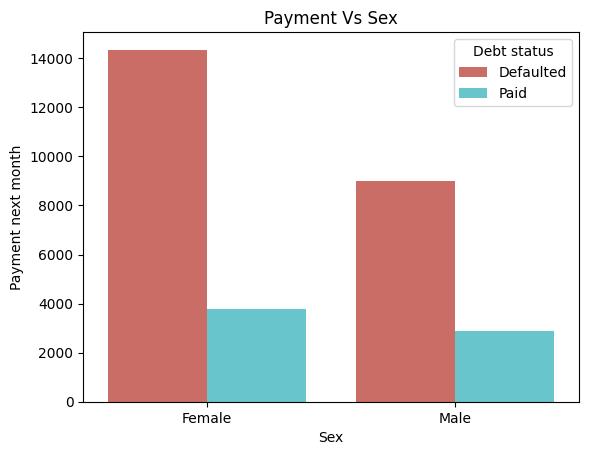

In [11]:

sns.countplot(data=df, x='SEX', hue='default payment next month', palette='hls')
plt.xlabel('Sex')
plt.ylabel('Payment next month')
plt.legend(title='Debt status', labels=['Defaulted', 'Paid'])
plt.title('Payment Vs Sex')
plt.show()

Остюда можно понять, что женщины чаще берут кредиты, при этом они очень часто невыполняют свои долговые обязательства, однако немного чаще отдают в срок, чем мужчины

In [12]:
payment_map = {1: "Paid", 0: "Default"}

mean_given_credit = df.groupby('default payment next month')['LIMIT_BAL'].mean().sort_values(ascending=False).reset_index()
mean_given_credit['default payment next month'] = mean_given_credit['default payment next month'].map(payment_map)

C:\Users\m4rce\AppData\Local\Temp\ipykernel_26448\1130952720.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=mean_given_credit, x='default payment next month', y='LIMIT_BAL', palette='hls')


Text(0.5, 1.0, 'Mean amount of the given credit vs customers payment')

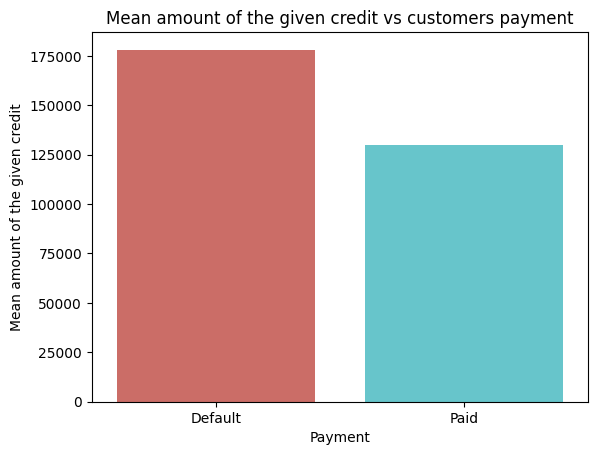

In [13]:

sns.barplot(data=mean_given_credit, x='default payment next month', y='LIMIT_BAL', palette='hls')
plt.xlabel('Payment')
plt.ylabel('Mean amount of the given credit')
plt.title('Mean amount of the given credit vs customers payment')

Исходя из графика, можно понять, что люди, не выполняющие долговые обязательства, в среднем, брали суммы больше, чем те, кто выполнял

In [14]:

mean_limit_bal_by_education = (
    df.groupby(['EDUCATION', 'default payment next month'])['LIMIT_BAL']
    .mean()
    .reset_index()
    )
mean_limit_bal_by_education

,EDUCATION,default payment next month,LIMIT_BAL
0,0,0,217142.857143
1,1,0,221224.704644
2,1,1,178236.738703
3,2,0,157790.280374
4,2,1,112591.591592
5,3,0,136138.586957
6,3,1,98025.610348
7,4,0,225517.241379
8,4,1,144285.714286
9,5,0,170595.419847


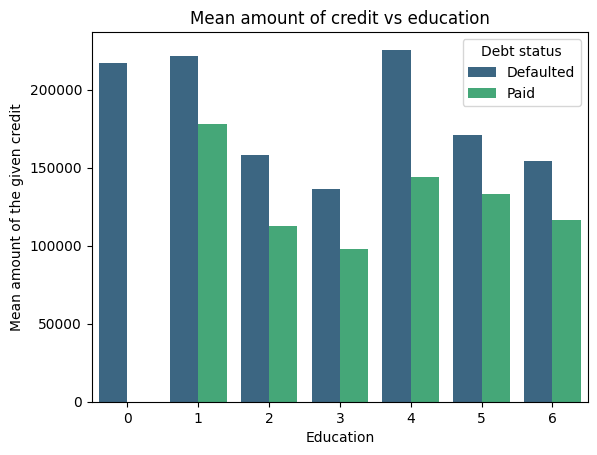

In [15]:
ax = sns.barplot(
    data=mean_limit_bal_by_education, 
    x='EDUCATION', 
    y='LIMIT_BAL', 
    hue='default payment next month', 
    palette='viridis',
    hue_order=[0, 1]
    )

handles, labels = ax.get_legend_handles_labels()

plt.xlabel('Education')
plt.ylabel('Mean amount of the given credit')
plt.legend(handles, ['Defaulted', 'Paid'], title="Debt status")
plt.title('Mean amount of credit vs education')
plt.show()

Исходя из графика, мы понимаем, что люди без определенного образования (цифра 0) никогда не выполняют договые обязательства, а также, в среднем, берут одни из самых больших кредитов. Также видно, люди с высшим образованием (аспирантура, магистратура (цифра - 1)) также берут, в среднем, большие кредиты, но также они являются теми, кто выполняет свои долговые обязательства при взятии больших сумм. Хуже всего дело обстоит с людьми с профессиональными образованиями (цифра - 4), у них, в среднем, самый большой кредит, который они не возвращают

C:\Users\m4rce\AppData\Local\Temp\ipykernel_26448\200549085.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


Text(0.5, 1.0, 'Age vs successful payment')

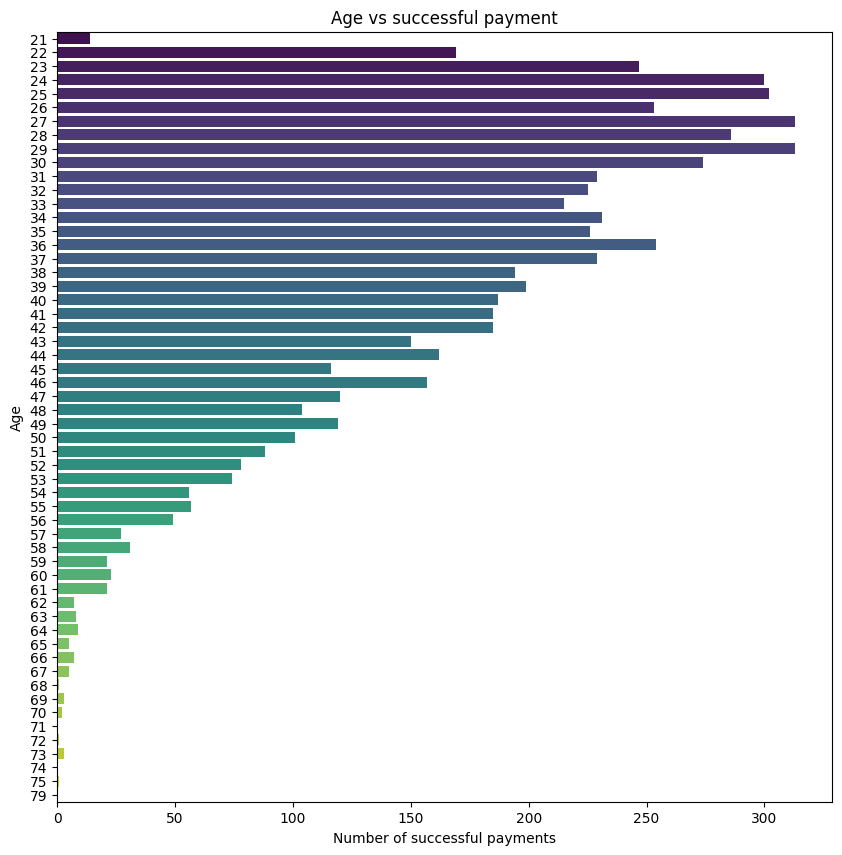

In [16]:
age_by_payment = (
    df.groupby('AGE')['default payment next month']
    .sum()
    .sort_values(ascending=False)
    .reset_index()
)

fig = plt.figure(figsize=(10, 10))

sns.barplot(
    data=age_by_payment,
    x='default payment next month',
    y='AGE',
    orient="h",
    palette='viridis'
)

plt.xlabel('Number of successful payments')
plt.ylabel('Age')
plt.title('Age vs successful payment')


Исходя из графика, можем увидеть, что люди, в возрасте от 22 до 34 лет лучше всего справляются с долговыми обязательствами. В тоже время, старики и люди в возрасте 22 лет очень редко отдают долги

C:\Users\m4rce\AppData\Local\Temp\ipykernel_26448\2597024808.py:25: MatplotlibDeprecationWarning: You have mixed positional and keyword arguments, some input may be discarded.  This is deprecated since 3.9 and will become an error in 3.11.
  plt.legend(handles, title='Debt status', labels=['Default', 'Paid'])


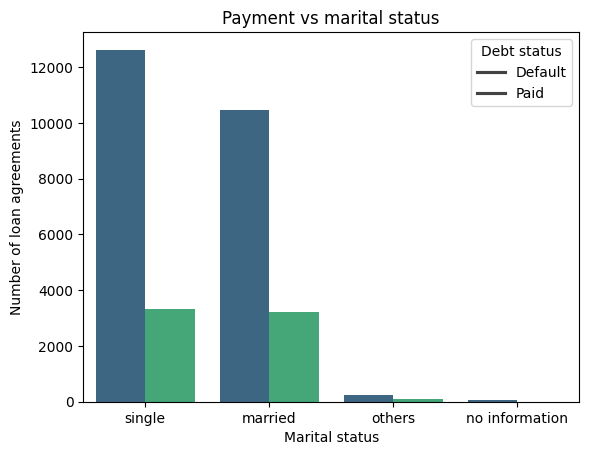

In [17]:
marriage_by_payment = (
    df.groupby(['MARRIAGE', 'default payment next month'])['default payment next month']
    .count()
    .reset_index(name='count')
    .sort_values('count', ascending=False)
)


marriage_map = {1: 'married', 2: 'single', 3: 'others', 0: 'no information'}
marriage_by_payment['MARRIAGE'] = marriage_by_payment['MARRIAGE'].map(marriage_map)
ax = sns.barplot(
    data=marriage_by_payment,
    x='MARRIAGE',
    y='count',
    palette='viridis',
    hue='default payment next month',
    hue_order=[0, 1]
)


handles, labels = ax.get_legend_handles_labels()

plt.xlabel('Marital status')
plt.ylabel('Number of loan agreements')
plt.legend(handles, title='Debt status', labels=['Default', 'Paid'])
plt.title('Payment vs marital status')
plt.show()

Исходя из графика, мы видим, что одинокие люди чаще не берут кредит и не возвращают его. Люди в браке не выполняют долговые обязателства чуть реже, но при этом отдают кредит к концу месяца почти также, как и одинокие. Про остальных можно сказать, что они чаще избегают кредитов

Text(0.5, 1.0, 'Correlation Matrix of Features')

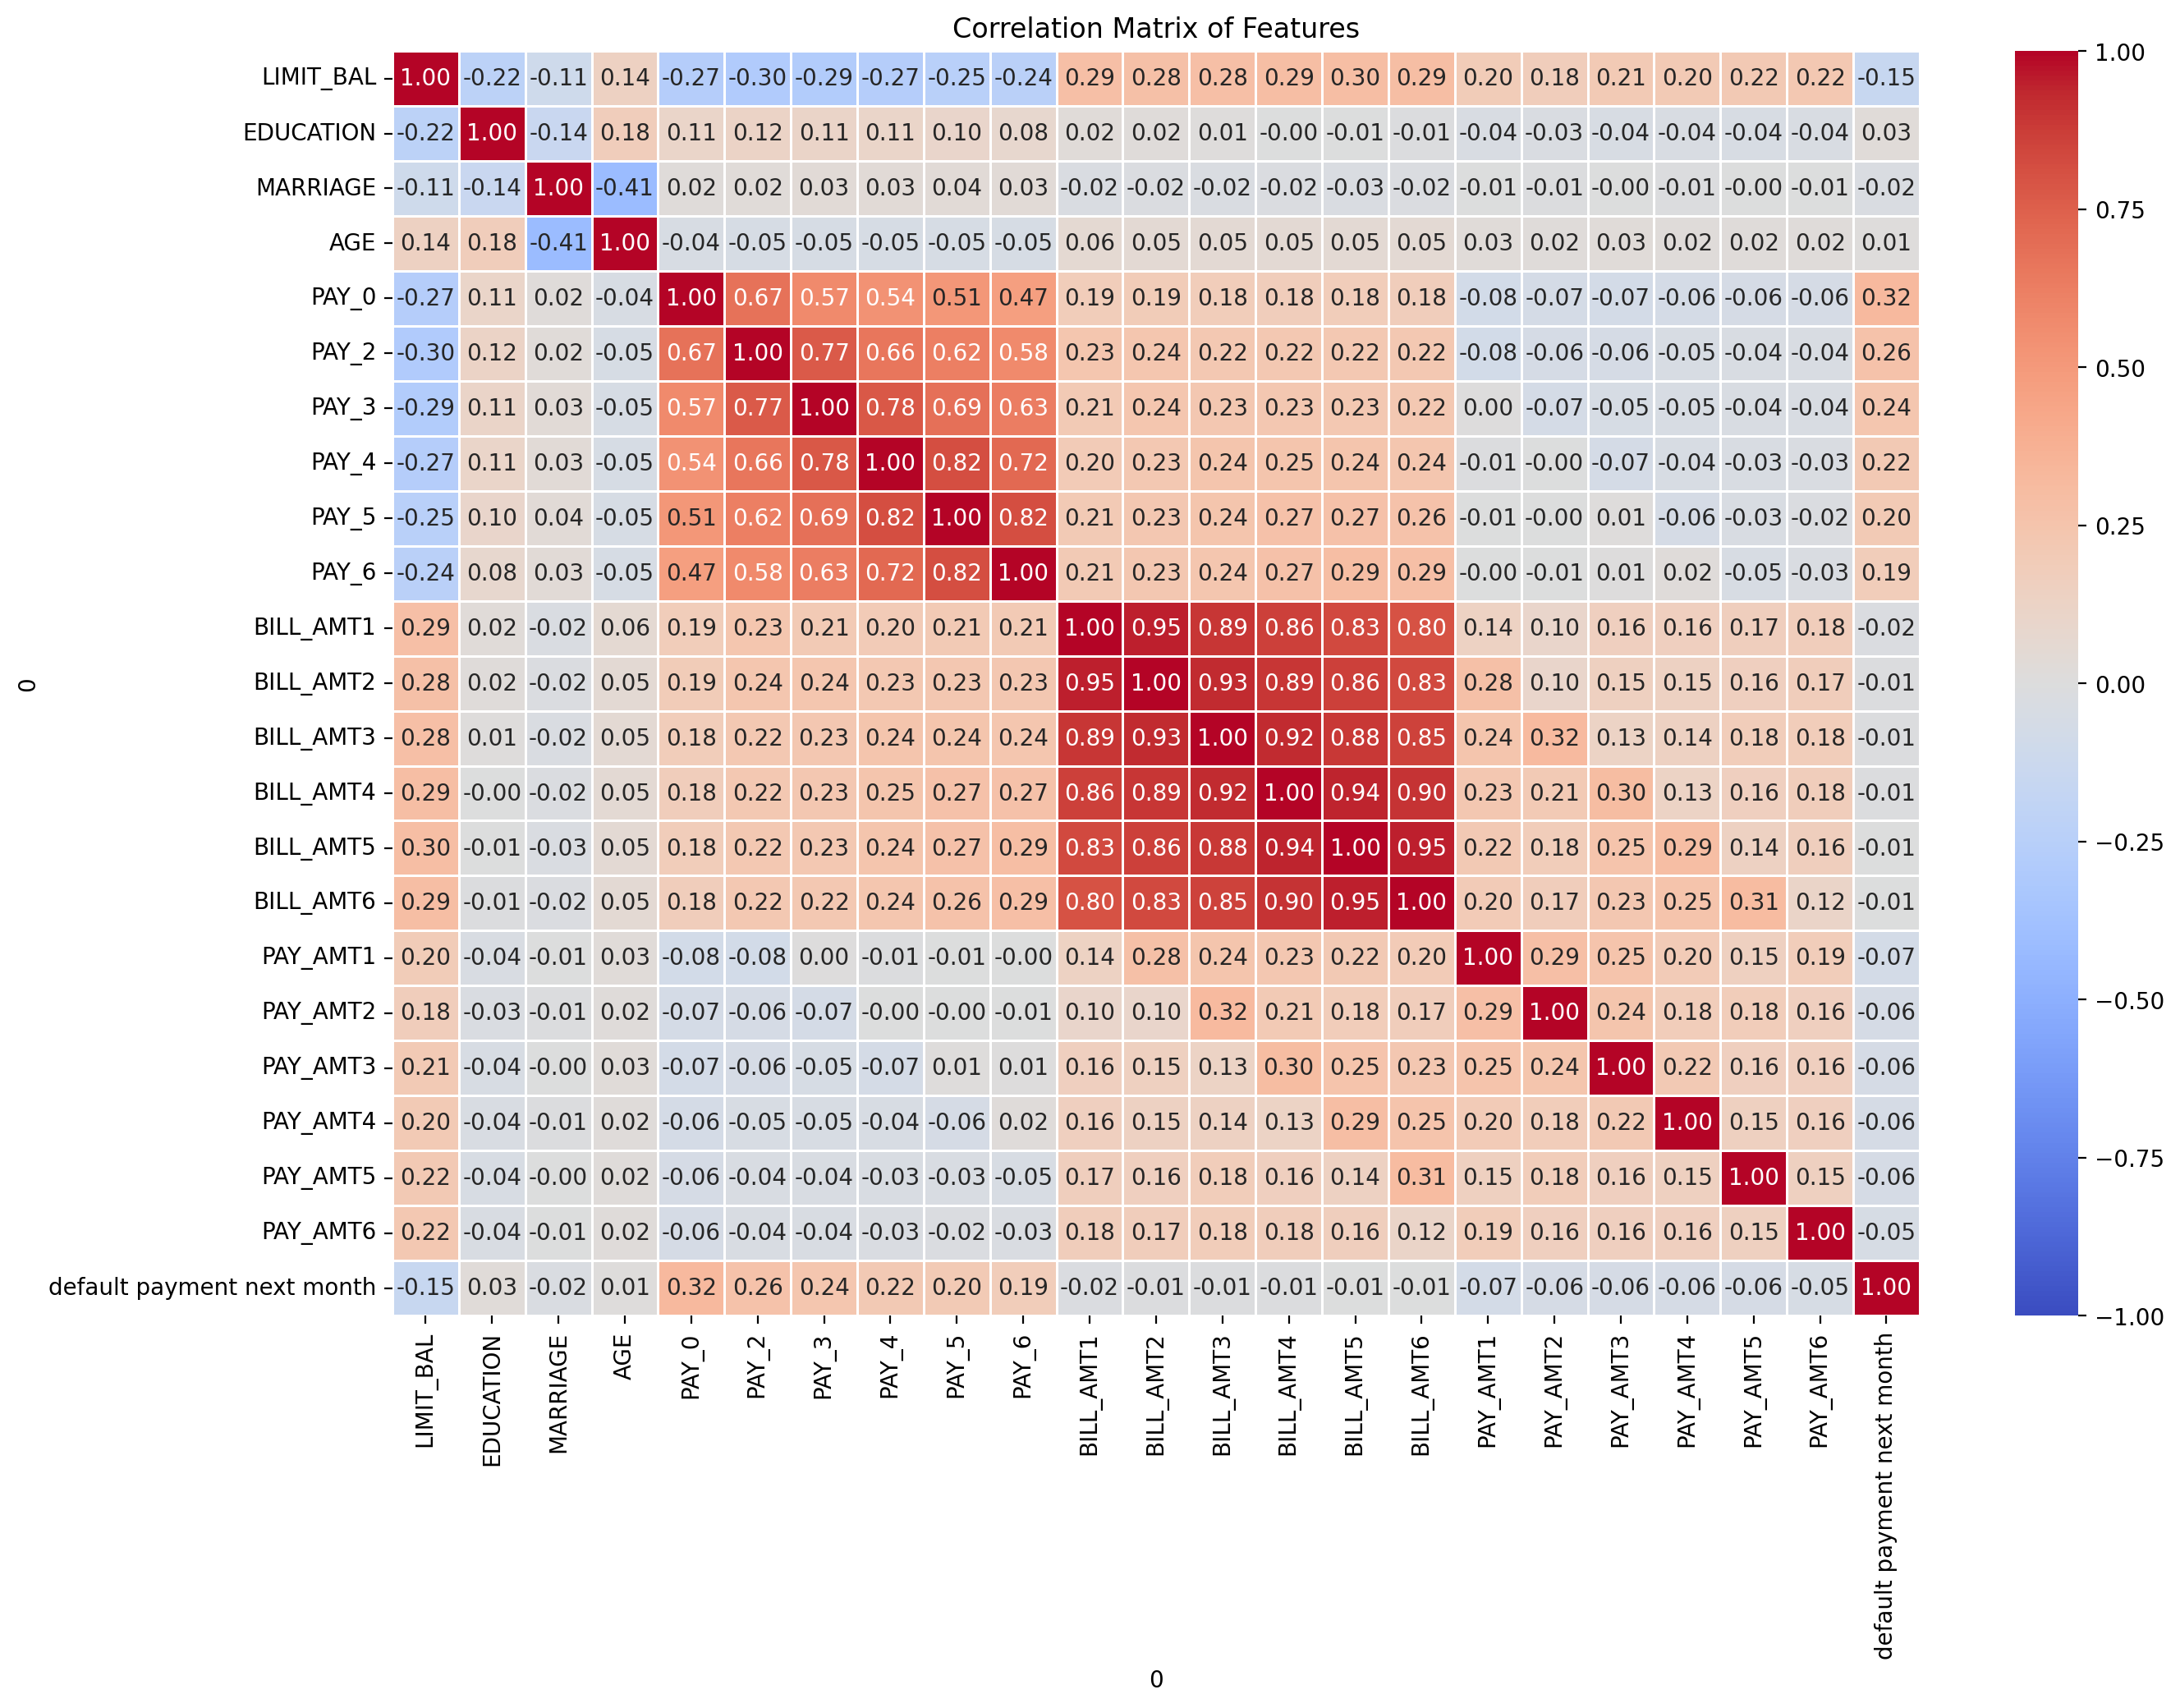

In [18]:
corr_cols = ['LIMIT_BAL', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'
]

fig =plt.figure(figsize=(15, 10), dpi=200)

corr_matrix = df[corr_cols].corr()
sns.heatmap(
    data=corr_matrix,
    annot=True,
    fmt='.2f',
    cmap='coolwarm',
    vmin=-1, vmax=1,
    linewidths=0.5
)

plt.title('Correlation Matrix of Features')

Можно заметить, что каждый следующий платех коррелирует с предыдущим, тоже самое с суммой выписки по счету, хотя, это может быть из-за того, что в конце каждого месяца у человека остается одна и та же сумма денег.

<Axes: xlabel='default payment next month', ylabel='count'>

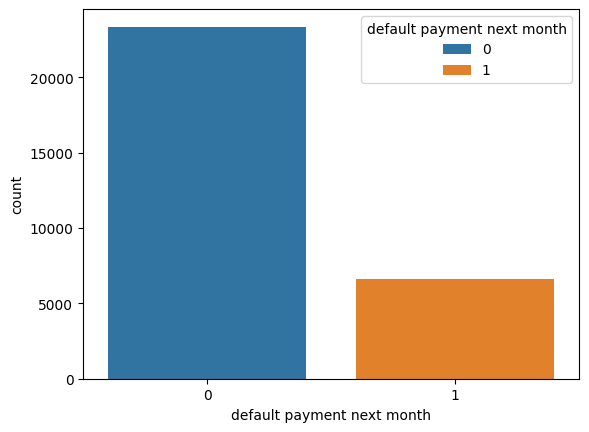

In [20]:
sns.countplot(data=df, x='default payment next month', hue='default payment next month')

Есть дисбаланс в классах